In [1]:
import os
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

import warnings
warnings.filterwarnings("ignore")

Set environment

In [2]:
path = 'Specify path'
os.chdir(path)

Load data

In [3]:
data = pd.read_csv(os.path.join(path, '99_sample_data/ashrae-energy-prediction/train.csv'))
weather = pd.read_csv(os.path.join(path, '99_sample_data/ashrae-energy-prediction/weather_train.csv'))

data = pd.merge(data[data.building_id == 0], weather, how = 'left', left_on = ['building_id', 'timestamp'],
                right_on = ['site_id', 'timestamp'])
df = data.rename(columns = {'timestamp': 'ds', 'meter_reading': 'y'}
                ).drop(columns = ['building_id', 'meter', 'site_id']).fillna(0)

train = df[:8000]
test = df[8000:].drop(columns = 'y').reset_index(drop = True)

train.head()

ds    y  air_temperature  cloud_coverage  dew_temperature  \
0  2016-01-01 00:00:00  0.0             25.0             6.0             20.0   
1  2016-01-01 01:00:00  0.0             24.4             0.0             21.1   
2  2016-01-01 02:00:00  0.0             22.8             2.0             21.1   
3  2016-01-01 03:00:00  0.0             21.1             2.0             20.6   
4  2016-01-01 04:00:00  0.0             20.0             2.0             20.0   

   precip_depth_1_hr  sea_level_pressure  wind_direction  wind_speed  
0                0.0              1019.7             0.0         0.0  
1               -1.0              1020.2            70.0         1.5  
2                0.0              1020.2             0.0         0.0  
3                0.0              1020.1             0.0         0.0  
4               -1.0              1020.0           250.0         2.6

Fit prophet and create future dataframe

In [10]:
m = Prophet(yearly_seasonality=True)
regressors = ['air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 
              'sea_level_pressure', 'wind_direction', 'wind_speed']
for r in regressors:
    m.add_regressor(r)

m.fit(train)

forecast = m.predict(pd.concat([train, test]))
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [12]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'air_temperature', 'air_temperature_lower', 'air_temperature_upper',
       'cloud_coverage', 'cloud_coverage_lower', 'cloud_coverage_upper',
       'daily', 'daily_lower', 'daily_upper', 'dew_temperature',
       'dew_temperature_lower', 'dew_temperature_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'precip_depth_1_hr',
       'precip_depth_1_hr_lower', 'precip_depth_1_hr_upper',
       'sea_level_pressure', 'sea_level_pressure_lower',
       'sea_level_pressure_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'wind_direction', 'wind_direction_lower', 'wind_direction_upper',
       'wind_speed', 'wind_speed_lower', 'wind_speed_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'mu

Plot resulting predictions

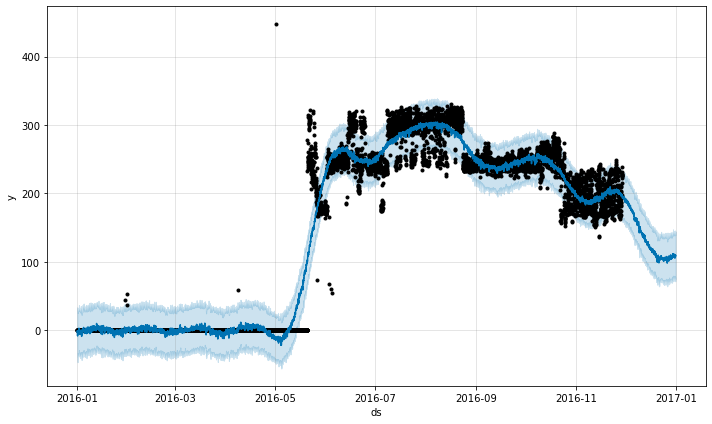

In [6]:
fig1 = m.plot(forecast)

In [7]:
py.init_notebook_mode()

fig = plot_plotly(m, forecast)
py.iplot(fig)

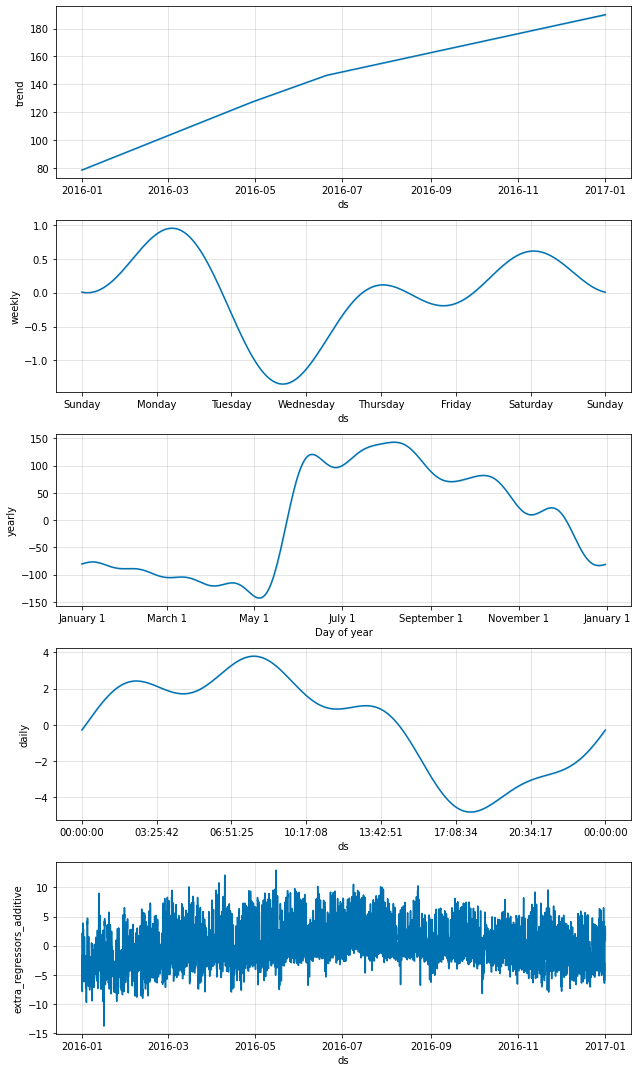

In [8]:
fig = m.plot_components(forecast)

In [ ]:
########### CREATE AUTOMATED TS REPORT OF PREDICTIONS AND EXISTING 
# by levels of sophistication of the prediction